In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

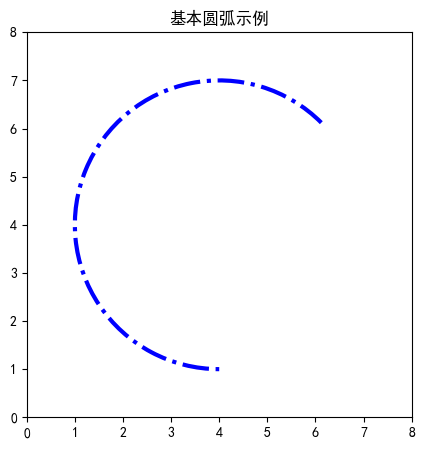

In [3]:
from matplotlib.patches import Arc

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)

# 绘制一个从45度到270度的圆弧
arc = Arc((4, 4),          # 椭圆中心的坐标
          width=6,         # 椭圆的宽度
          height=6,        # 椭圆的高度
          angle=0,         # 旋转角度
          theta1=45,       # 起始角度
          theta2=270,      # 终止角度
          linewidth=3,     # 线宽
          linestyle='-.',  # 线型
          color='blue'     # 颜色
         )

# 添加到画布
ax.add_patch(arc)

# 设置等比例并显示
ax.set_aspect('equal')
plt.title('基本圆弧示例')
plt.show()

# 2、使用示例：

### 示例 1：创建环形图部分

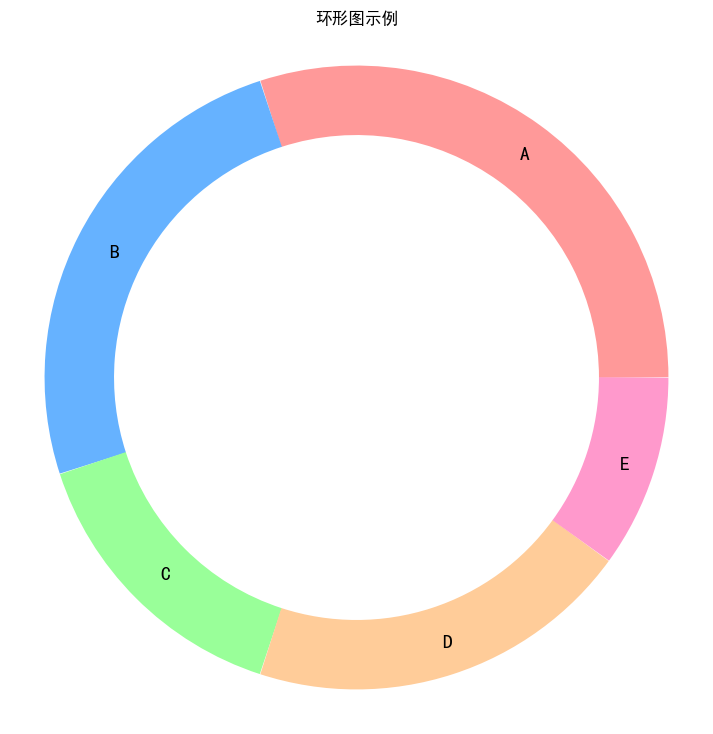

In [4]:
from matplotlib.patches import Arc, Wedge

fig, ax = plt.subplots(figsize=(9, 9))

# 数据
data = [30, 25, 15, 20, 10]
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
labels = ['A', 'B', 'C', 'D', 'E']

# 计算累积角度
cumulative = np.cumsum([0] + data)
total = sum(data)

# 环形图参数设置
center = (0.5, 0.5)  # 环形图中心坐标
radius = 0.4         # 环形图外半径
width = 0.2          # 环形的宽度

for i in range(len(data)):
    # 计算起始和结束角度
    theta1 = cumulative[i] / total * 360
    theta2 = cumulative[i+1] / total * 360
    
    # 绘制外弧
    arc_outer = Arc(center, radius*2, radius*2, 
                   theta1=theta1, theta2=theta2, 
                   linewidth=50, color=colors[i])
    
    # 绘制内弧
    arc_inner = Arc(center, (radius-width)*2, (radius-width)*2, 
                   theta1=theta1, theta2=theta2, 
                   linewidth=20, color='white')
    
    ax.add_patch(arc_outer)
    ax.add_patch(arc_inner)

    # 计算标签位置：扇区的中间角度
    mid_angle = (theta1 + theta2) / 2
    # 将角度转换为弧度（numpy三角函数需要弧度制）
    mid_rad = np.radians(mid_angle)
    # 计算标签的坐标
    label_x = center[0] + radius * np.cos(mid_rad)
    label_y = center[1] + radius * np.sin(mid_rad) 
    # 添加标签文本
    ax.text(label_x, label_y, labels[i], 
            fontsize=14, fontweight='bold',
            va='center',
            color='black')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
plt.title('环形图示例')
plt.show()

### 示例 2：创建自定义形状

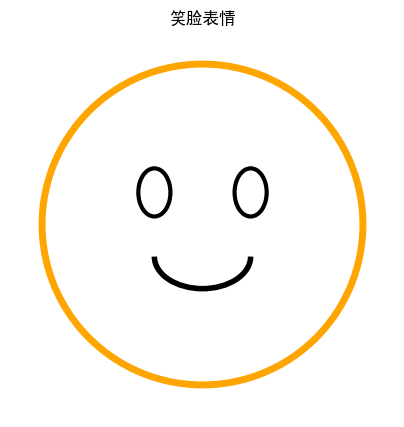

In [5]:
from matplotlib.patches import Arc, Rectangle

fig, ax = plt.subplots(figsize=(5, 5))

face_center = (0, 0)
face_radius = 5

# 脸型
face = Arc(face_center, face_radius*2, face_radius*2, 
           theta1=0, theta2=360, linewidth=5, color='orange')

# 嘴巴
smile = Arc((0, -1), 3, 2, theta1=180, theta2=360, linewidth=4, color='black')

# 左眼
left_eye = Arc((-1.5, 1), 1, 1.5, theta1=0, theta2=360, linewidth=3, color='black')

# 右眼
right_eye = Arc((1.5, 1), 1, 1.5, theta1=0, theta2=360, linewidth=3, color='black')

# 添加到画布
ax.add_patch(face)
ax.add_patch(smile)
ax.add_patch(left_eye)
ax.add_patch(right_eye)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
ax.axis('off')
plt.title('笑脸表情')
plt.show()

### 示例 3：绘制仪表盘

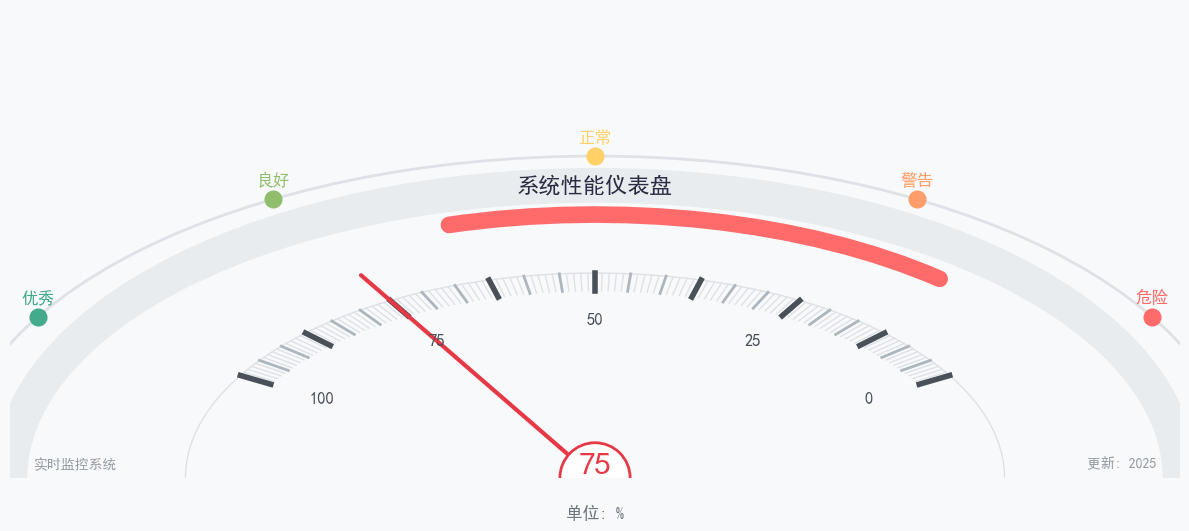

In [6]:
from matplotlib.patches import Arc, Circle, Wedge
import matplotlib.patches as patches

# 创建画布
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('#f8f9fa')

# 仪表盘参数
center_x, center_y = 0.5, 0
outer_radius = 0.5
inner_radius = 0.35
needle_radius = 0.4

# 绘制背景圆弧（底座）
base_arc = Arc((center_x, center_y), width=1, height=0.5, 
               theta1=0, theta2=180, linewidth=25, 
               color='#e9ecef', capstyle='round')

# 绘制刻度区域 - 使用渐变色
for i, angle in enumerate(np.linspace(0, 180, 181)):
    if i % 15 == 0:  # 主刻度
        color = '#495057'
        width = 4
    elif i % 5 == 0:  # 次刻度
        color = '#adb5bd'
        width = 2
    else:  # 小刻度
        color = '#dee2e6'
        width = 1
        
    if 30 <= angle <= 150:  # 只在有效范围内绘制刻度
        rad_angle = np.radians(angle)
        x1 = center_x + inner_radius * np.cos(rad_angle)
        y1 = center_y + inner_radius * 0.5 * np.sin(rad_angle)
        x2 = center_x + (inner_radius - 0.03) * np.cos(rad_angle)
        y2 = center_y + (inner_radius - 0.03) * 0.5 * np.sin(rad_angle)
        
        ax.plot([x1, x2], [y1, y2], color=color, linewidth=width)

# 绘制指针弧（当前值指示）
current_value = 75  # 当前值（0-100）
needle_angle = 30 + (current_value / 100) * 120 

needle_arc = Arc((center_x, center_y), width=0.9, height=0.45, 
                 theta1=30, theta2=needle_angle, linewidth=12, 
                 color='#ff6b6b', capstyle='round')

# 绘制指针
needle_rad = np.radians(needle_angle)
needle_x = center_x + needle_radius * np.cos(needle_rad)
needle_y = center_y + needle_radius * 0.5 * np.sin(needle_rad)

ax.plot([center_x, needle_x], [center_y, needle_y], 
        color='#e63946', linewidth=3, solid_capstyle='round')

# 绘制中心圆
center_circle = Circle((center_x, center_y), 0.03, color='white', 
                      ec='#e63946', linewidth=2, zorder=10)

# 添加刻度标签
for value, angle in zip([0, 25, 50, 75, 100], [30, 60, 90, 120, 150]):
    rad_angle = np.radians(angle)
    label_radius = inner_radius - 0.08
    x = center_x + label_radius * np.cos(rad_angle)
    y = center_y + label_radius * 0.5 * np.sin(rad_angle)
    
    ax.text(x, y, str(value), ha='center', va='center', 
            fontsize=12, fontweight='bold', color='#495057')

# 添加数值显示
value_display = ax.text(center_x, center_y+0.01, f'{current_value}', 
                       ha='center', va='center', fontsize=24, 
                       fontweight='bold', color='#e63946', zorder=15)

# 添加单位标签
ax.text(center_x, center_y - 0.03, '单位: %', ha='center', va='center', 
        fontsize=12, color='#6c757d')

# 添加标题
ax.text(center_x, center_y + 0.25, '系统性能仪表盘', ha='center', va='center', 
        fontsize=16, fontweight='bold', color='#2b2d42')

# 添加状态指示器
status_colors = ['#ff6b6b', '#ff9e6b', '#ffd166', '#90be6d', '#43aa8b']
status_labels = ['危险', '警告', '正常', '良好', '优秀']

for i, (color, label) in enumerate(zip(status_colors, status_labels)):
    status_angle = 30 + (i * 30)
    status_rad = np.radians(status_angle)
    x = center_x + (outer_radius + 0.05) * np.cos(status_rad)
    y = center_y + (outer_radius + 0.05) * 0.5 * np.sin(status_rad)
    
    ax.plot(x, y, 'o', markersize=12, color=color)
    ax.text(x, y + 0.01, label, ha='center', va='bottom', 
            fontsize=12, color=color, fontweight='bold')

# 添加装饰性元素
# 外环
outer_ring = Arc((center_x, center_y), width=1.1, height=0.55, 
                theta1=0, theta2=180, linewidth=2, 
                color='#dee2e6')

# 内环
inner_ring = Arc((center_x, center_y), width=0.7, height=0.35, 
                theta1=0, theta2=180, linewidth=1, 
                color='#dee2e6')

# 添加到画布
ax.add_patch(base_arc)
ax.add_patch(needle_arc)
ax.add_patch(center_circle)
ax.add_patch(outer_ring)
ax.add_patch(inner_ring)

# 设置坐标轴范围和比例
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.4)
ax.set_aspect('equal')
ax.axis('off')

# 添加网格背景（轻微）
ax.set_facecolor('#f8f9fa')
ax.grid(True, alpha=0.1, color='gray')

# 添加边框
for spine in ax.spines.values():
    spine.set_visible(False)

# 添加装饰性文本
ax.text(0.02, 0.02, '实时监控系统', transform=ax.transAxes, 
        fontsize=10, color='#6c757d', alpha=0.7)
ax.text(0.98, 0.02, '更新: 2025', transform=ax.transAxes, 
        fontsize=10, color='#6c757d', alpha=0.7, ha='right')

plt.tight_layout()
plt.show()